# Laptop Price Prediction - Exploratory Data Analysis (EDA)

In this notebook, we will explore the dataset to understand relationships between features and the target variable (`Price_euros`).
We will:
1. Explore numeric features (distributions, correlations)
2. Explore categorical features (company, type, etc.)
3. Visualize feature-target relationships

### Step 0: Setup
Import necessary libraries and load the cleaned dataset from `../data/processed/laptops_clean.csv`.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# Load the cleaned dataset
data = pd.read_csv("../data/processed/laptops_cleanned.csv")

# Quick check
print("Shape:", data.shape)
data.head()

Shape: (1303, 17)


,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Touchscreen,X_resolution,Y_resolution,Cpu_brand,Cpu_speed
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,0,2560,1600,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,0,1440,900,Intel Core i5,1.8
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,0,1920,1080,Intel Core i5 7200U,2.5
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,0,2880,1800,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,0,2560,1600,Intel Core i5,3.1


### Step 1: Basic Statistics
Check the shape, summary statistics, and missing values.

In [11]:
print("Shape of dataset:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
data.describe()

Shape of dataset: (1303, 17)

Missing values:
 Company          0
TypeName         0
Inches           0
Ram              0
Gpu              0
OpSys            0
Weight           0
Price_euros      0
SSD              0
HDD              0
Hybrid           0
Flash_Storage    0
Touchscreen      0
X_resolution     0
Y_resolution     0
Cpu_brand        0
Cpu_speed        0
dtype: int64


,Inches,Ram,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Touchscreen,X_resolution,Y_resolution,Cpu_speed
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,184.027629,422.477360,9.034536,4.555641,0.147352,1768.193400,1070.830391,2.298772
std,1.426304,5.084665,0.665475,699.009043,188.268689,528.006298,94.738890,30.274090,0.354593,470.888913,284.519410,0.506340
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,768.000000,0.900000
25%,14.000000,4.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,900.000000,2.000000
50%,15.600000,8.000000,2.040000,977.000000,256.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,2.500000
75%,15.600000,8.000000,2.300000,1487.880000,256.000000,1024.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,2.700000
max,18.400000,64.000000,4.700000,6099.000000,1024.000000,2048.000000,1024.000000,512.000000,1.000000,3200.000000,2160.000000,3.600000


### Step 2: Distribution of Price
Visualize the distribution of the target variable to see its spread.

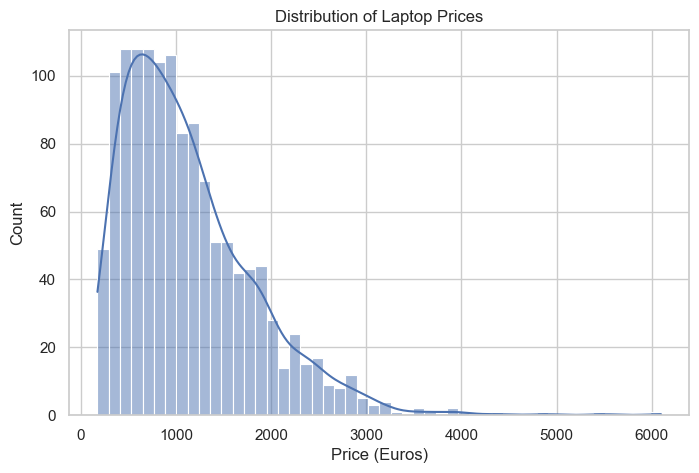

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Price_euros'], bins=50, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()

### Step 3: Correlation Heatmap
Check correlations among numeric features and price.

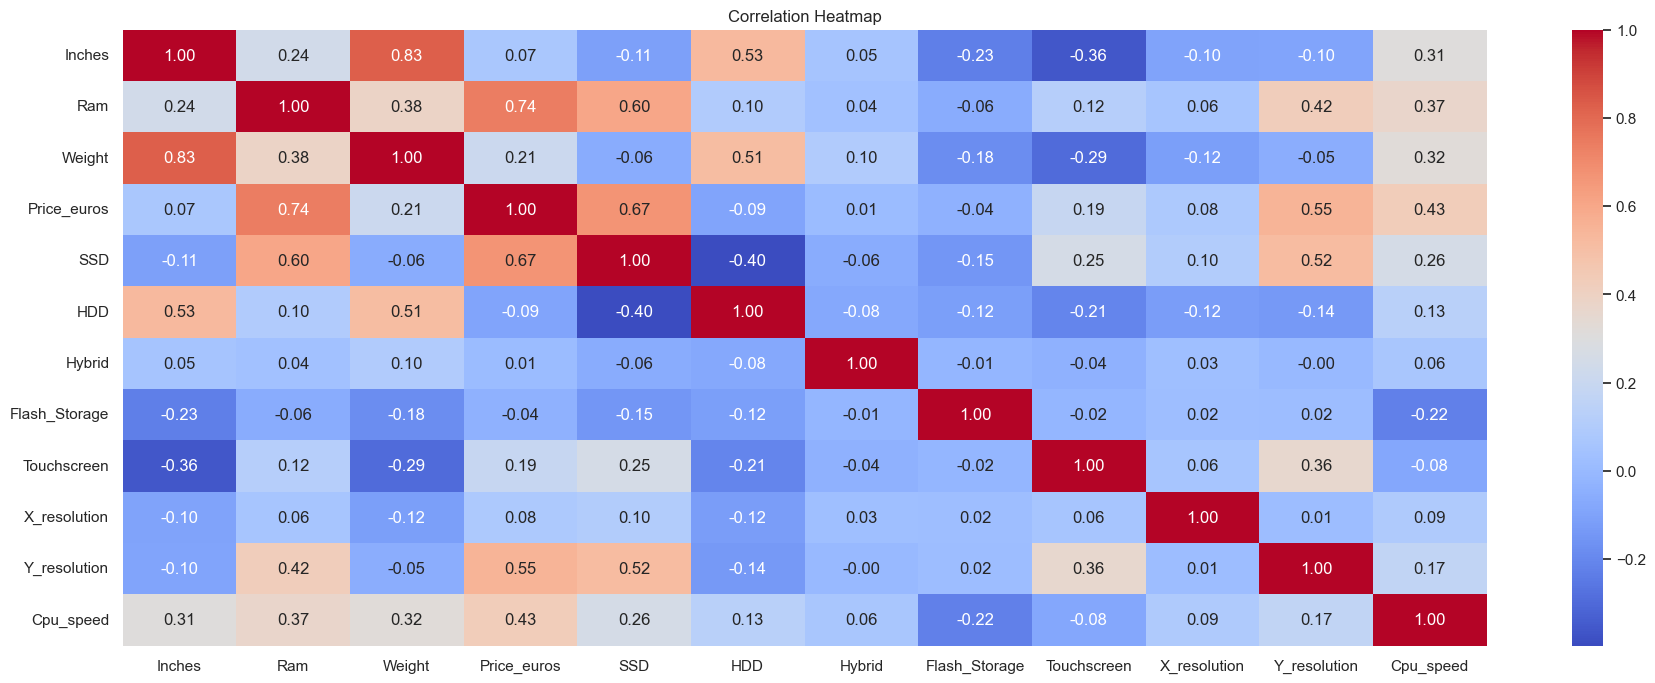

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(22,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
plt.savefig("../reports/figures/correlation_heatmap.png")

### Step 4: Price vs Company
Check how average laptop price varies by company.

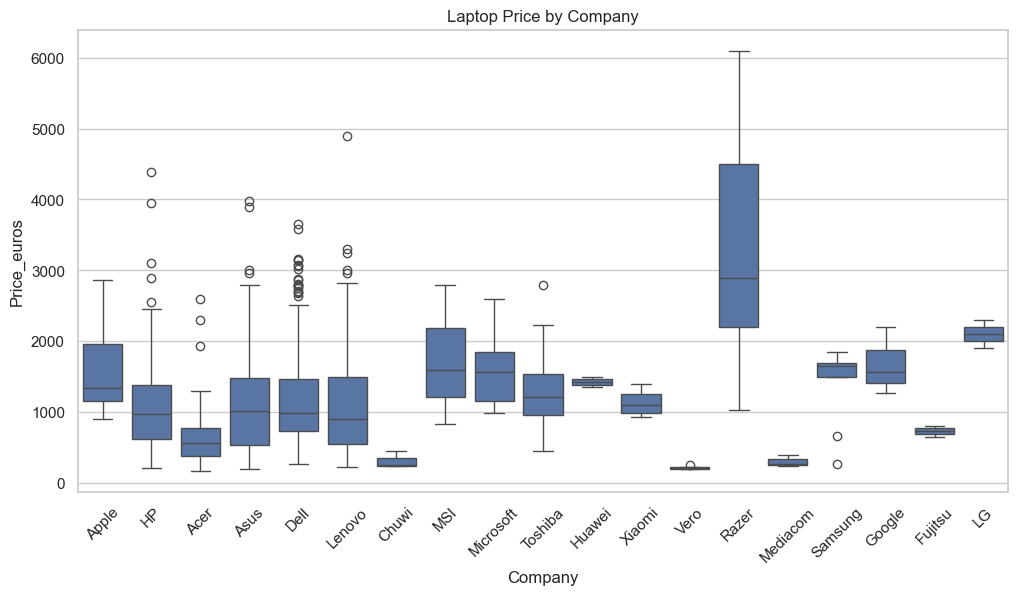

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Company", y="Price_euros", data=data)
plt.xticks(rotation=45)
plt.title("Laptop Price by Company")
plt.show()
plt.savefig("../reports/figures/price_by_company.png")

### Step 5: Price vs Laptop Type
Check how average price varies by type (e.g., Ultrabook, Gaming).

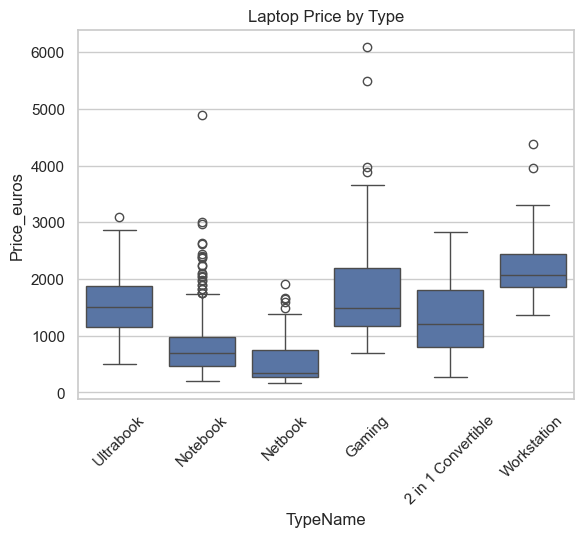

<Figure size 640x480 with 0 Axes>

In [15]:
eda = pd.read_csv("../data/raw/laptop_price.csv", encoding="ISO-8859-1")
sns.boxplot(x="TypeName", y="Price_euros", data=eda)
plt.xticks(rotation=45)
plt.title("Laptop Price by Type")
plt.show()
plt.savefig("../reports/figures/price_by_type.png")

### Step 6: Price vs RAM
Check how price changes with RAM size.

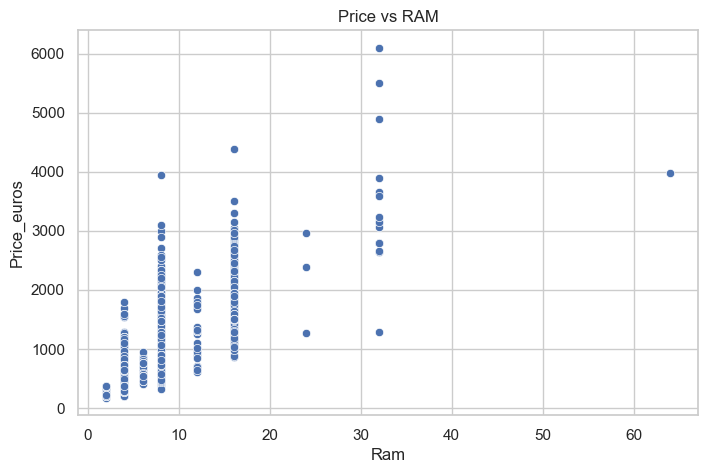

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Ram", y="Price_euros", data=data)
plt.title("Price vs RAM")
plt.show()
plt.savefig("../reports/figures/price_by_ram.png")

### Step 7: Price vs Weight
Check if lighter laptops tend to cost more.

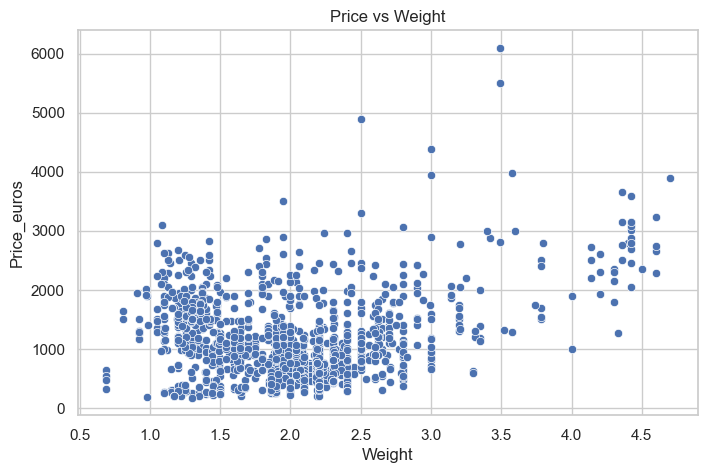

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Weight", y="Price_euros", data=data)
plt.title("Price vs Weight")
plt.show()
plt.savefig("../reports/figures/price_by_weight.png")

### Step 8: Save EDA Figures (Optional)
We can save plots for reports/presentation.

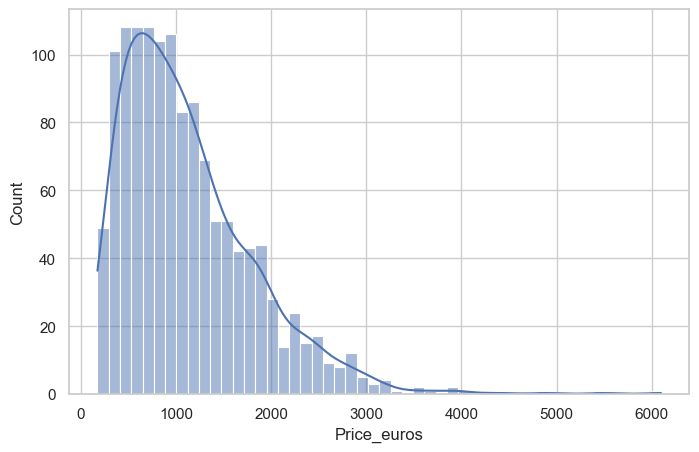

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data["Price_euros"], bins=50, kde=True)
plt.savefig("../reports/figures/price_distribution.png")